# **CAPSTONE PROJECT** - Target customer prediction

## PART 5 - EDA - HOUSEHOLDS ANALYSIS WITH FULL TRANSACTIONS OF 102 WEEKS

This is to have an overview on customer segments and their values over full period of 2 years

By Chau Tran

## TABLE OF CONTENTS<a id="top5"></a>

* [Load libraries and data](#data5)
* [A look into customer segmentations](#segmentationsFull)
* [Customer values vs all numerical columns](#customerValuesFull)


### Load libraries and data<a id="data5"></a>
[Back to top](#top5)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns

sns.set(color_codes = True)

pd.set_option('display.max_rows', 50)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

%matplotlib inline

In [2]:
households_full = pd.read_csv('DATA_CLEAN/households_full.csv')

In [3]:
households_full

,household_key,received_campaign,redeemed_coupons,TypeA,TypeB,TypeC,total_campaigns_received,total_campaigns_engaged,total_coupons_received,total_coupons_redeemed,camp_conversion_rate,coupon_conversion_rate,recency,frequency,monetary,rfm_group,rfm_score,segment,GROCERY_spend,DELI_spend,PRODUCE_spend,KIOSK-GAS_spend,DRUG GM_spend,NUTRITION_spend,SALAD BAR_spend,MEAT_spend,campA_26_converted,campA_30_converted,campA_8_converted,campA_13_converted,campA_18_converted,campB_28_converted,campB_29_converted,campB_1_converted,campB_2_converted,campB_4_converted,campB_5_converted,campB_7_converted,campB_9_converted,campB_10_converted,campB_12_converted,campB_11_converted,campB_16_converted,campB_17_converted,campB_19_converted,campB_22_converted,campB_21_converted,campB_23_converted,campB_25_converted,campB_24_converted,campC_27_converted,campC_3_converted,campC_6_converted,campC_14_converted,campC_15_converted,campC_20_converted,age_desc,marital_status_code,income_desc,homeowner_desc,hh_comp_desc,household_size_desc,kid_category_desc
0,1,1,1,3.0,4.0,1.0,8.0,5.0,159.0,5.0,0.62,0.03,5,86,4330.16,333,9,Loyal,2755.00,212.17,266.10,0.00,530.89,48.33,41.20,17.91,0,0,1,1,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,65+,A,35-49K,Homeowner,2 Adults No Kids,2,None/Unknown
1,2,1,0,1.0,0.0,0.0,1.0,0.0,16.0,0.0,0.00,0.00,43,45,1954.34,122,5,Required activation,1112.49,46.73,152.28,0.00,330.04,7.47,0.00,154.32,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,1,0,2.0,0.0,1.0,3.0,0.0,58.0,0.0,0.00,0.00,8,47,2653.21,223,7,Need attention,1784.75,36.47,68.03,20.01,159.08,0.00,1.36,317.27,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,1,0,1.0,0.0,0.0,1.0,0.0,16.0,0.0,0.00,0.00,84,30,1200.11,112,4,Required activation,698.73,14.35,4.87,0.00,318.98,3.29,0.00,38.74,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,8,40,779.06,221,5,Required activation,359.13,80.03,2.19,0.00,203.08,2.00,0.00,49.75,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2495,2496,1,1,3.0,1.0,1.0,5.0,11.0,93.0,11.0,2.20,0.12,28,63,4339.66,123,6,Need attention,1858.18,98.92,239.10,324.01,334.14,7.79,0.00,1068.17,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,45-54,A,75-99K,Homeowner,Unknown,3,1
2496,2497,1,0,3.0,0.0,0.0,3.0,0.0,48.0,0.0,0.00,0.00,11,221,7111.98,244,10,Loyal,4099.58,285.94,698.54,126.10,699.35,17.28,5.78,684.42,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,45-54,U,35-49K,Unknown,Single Male,1,None/Unknown
2497,2498,1,0,3.0,2.0,1.0,6.0,0.0,81.0,0.0,0.00,0.00,1,172,2601.60,443,11,Champions,1727.99,49.60,96.64,0.00,308.94,53.34,18.75,20.44,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,25-34,U,50-74K,Homeowner,2 Adults No Kids,2,None/Unknown
2498,2499,1,0,2.0,0.0,0.0,2.0,0.0,32.0,0.0,0.00,0.00,2,90,3394.07,333,9,Loyal,2018.81,79.79,119.44,160.01,301.55,7.69,0.00,149.47,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,25-34,U,Under 15K,Unknown,2 Adults Kids,3,1


### A look into customer segmentations<a id="segmentationsFull"></a>
[Back to top](#top5)

(array([1.771e+03, 4.920e+02, 1.510e+02, 6.200e+01, 1.600e+01, 5.000e+00,
        1.000e+00, 1.000e+00, 0.000e+00, 1.000e+00]),
 array([8.1700000e+00, 3.8393320e+03, 7.6704940e+03, 1.1501656e+04,
        1.5332818e+04, 1.9163980e+04, 2.2995142e+04, 2.6826304e+04,
        3.0657466e+04, 3.4488628e+04, 3.8319790e+04]),
 <BarContainer object of 10 artists>)

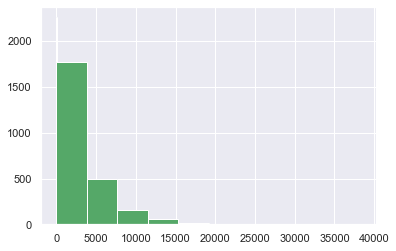

In [7]:
plt.hist(households_full.recency)
plt.hist(households_full.frequency)
plt.hist(households_full.monetary)

(array([514.,   0.,   0., 698.,   0.,   0., 794.,   0.,   0., 494.]),
 array([0. , 0.3, 0.6, 0.9, 1.2, 1.5, 1.8, 2.1, 2.4, 2.7, 3. ]),
 <BarContainer object of 10 artists>)

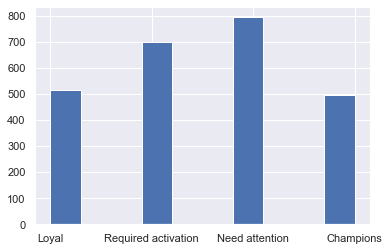

In [8]:
plt.hist(households_full.segment)

(array([281., 206., 211., 263., 268., 263., 254., 260., 268., 226.]),
 array([ 3. ,  3.9,  4.8,  5.7,  6.6,  7.5,  8.4,  9.3, 10.2, 11.1, 12. ]),
 <BarContainer object of 10 artists>)

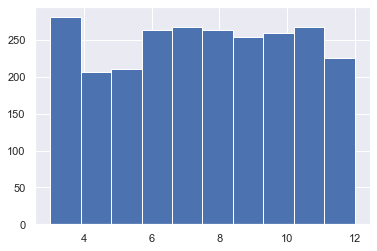

In [9]:
plt.hist(households_full.rfm_score)

In [10]:
# Calculate average values for each rfm group

rfm_level_agg = households_full.groupby('segment').agg({
    'recency': 'mean',
    'frequency': 'mean',
    'monetary': ['mean', 'count']
}).round(1)

print(rfm_level_agg)

                    recency frequency monetary      
                       mean      mean     mean count
segment                                             
Champions               1.4     261.0   7718.3   494
Loyal                   6.2     135.4   4103.1   514
Need attention         14.2      73.4   2064.4   794
Required activation    69.9      28.1    711.2   698


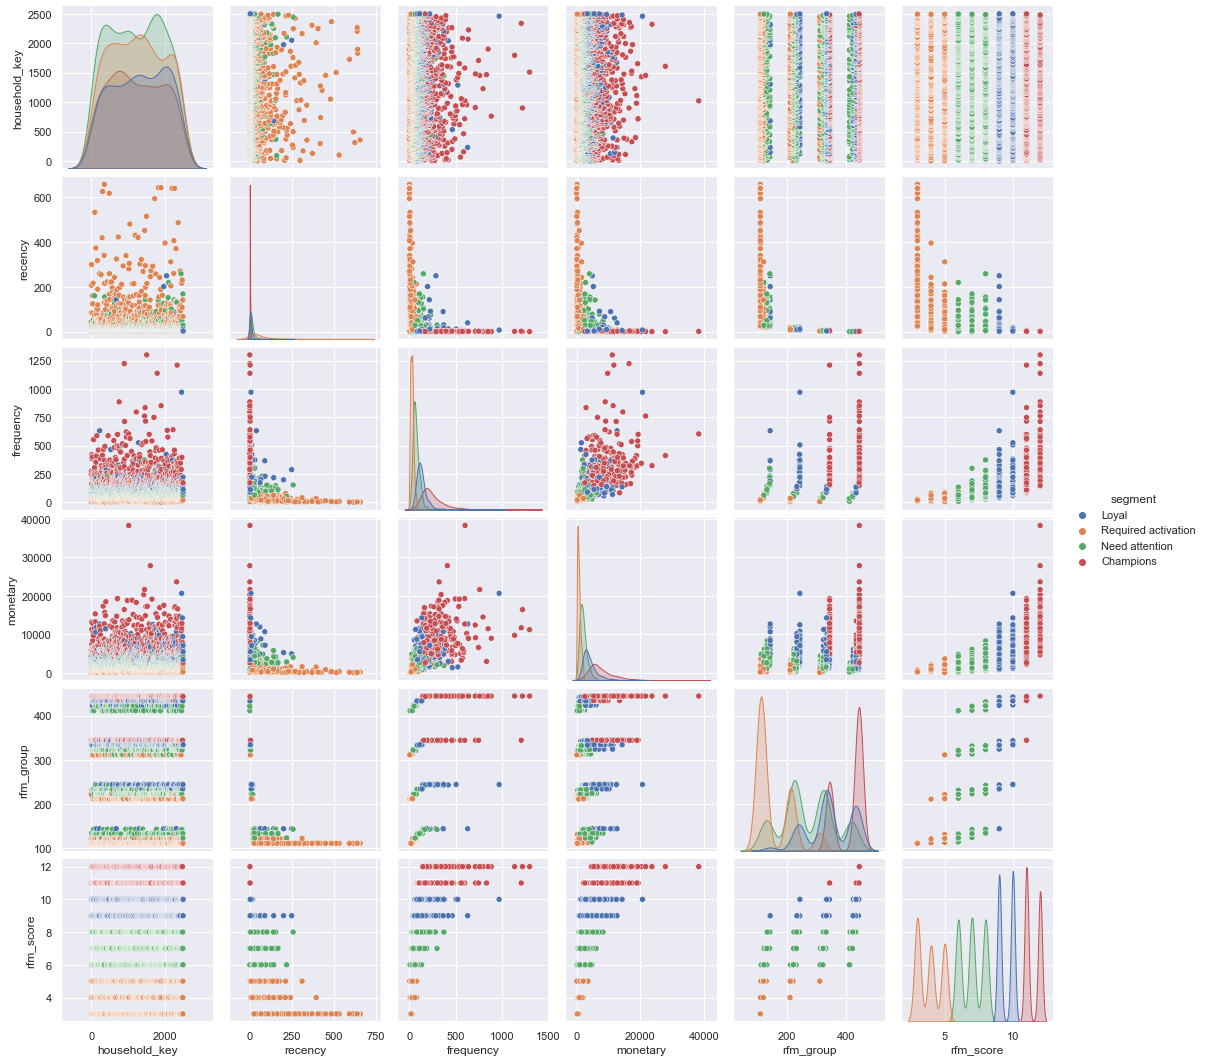

In [11]:
segnment = households_full[['household_key','recency','frequency','monetary','rfm_group','rfm_score','segment']]
sns.pairplot(data=segnment,hue='segment')

### Customer values vs all numerical columns<a id="customerValuesFull"></a>
[Back to top](#top5)

In [32]:
# get all numerical columns
numerical_dtypes = ['int16','int32', 'int64','float16','float32','float64']
num_cols = []
all_cols = [col for col in households_full.columns if not(col.startswith('camp'))]

for i in all_cols:
    if (households_full[i].dtype in numerical_dtypes):
        num_cols.append(i)
        
print(len(num_cols))
print(num_cols)

cat_cols = set(all_cols) - set(num_cols)
print(len(cat_cols))
print(cat_cols)

24
['household_key', 'received_campaign', 'redeemed_coupons', 'TypeA', 'TypeB', 'TypeC', 'total_campaigns_received', 'total_campaigns_engaged', 'total_coupons_received', 'total_coupons_redeemed', 'coupon_conversion_rate', 'recency', 'frequency', 'monetary', 'rfm_group', 'rfm_score', 'GROCERY_spend', 'DELI_spend', 'PRODUCE_spend', 'KIOSK-GAS_spend', 'DRUG GM_spend', 'NUTRITION_spend', 'SALAD BAR_spend', 'MEAT_spend']
8
{'income_desc', 'marital_status_code', 'homeowner_desc', 'segment', 'kid_category_desc', 'hh_comp_desc', 'age_desc', 'household_size_desc'}


In [33]:
# plot average monetary (lifetime value) of all numerical columns

def plot_multi_charts(data, x_column_list, y, title, y_label, plot_type, figsize):
    fig = plt.figure(figsize=figsize)
    fig.subplots_adjust(hspace=0.8, wspace=0.4, top=0.96)
    fig.suptitle(title)

    for i, col in enumerate(list(data[x_column_list]),1):
        
        ax = fig.add_subplot(len(x_column_list), 3, i)
        
        if plot_type == 'scatter':
            plt.scatter(x=data[col], y=data[y])
            plt.xlabel('{}'.format(col), size=15,labelpad=12.5)
            plt.ylabel(y_label, size=15, labelpad=12.5)
        elif plot_type == 'bar':
            data.groupby(col).agg({y:'mean'}).sort_values(by=y,ascending=False).plot.bar(ax=ax)
        
        plt.xticks(rotation=90)
#     figname = title + '.png'
#     fig.savefig(figname,transparent=False, bbox_inches='tight', dpi=300)
   
    plt.xticks(rotation=45)
    plt.show()
    

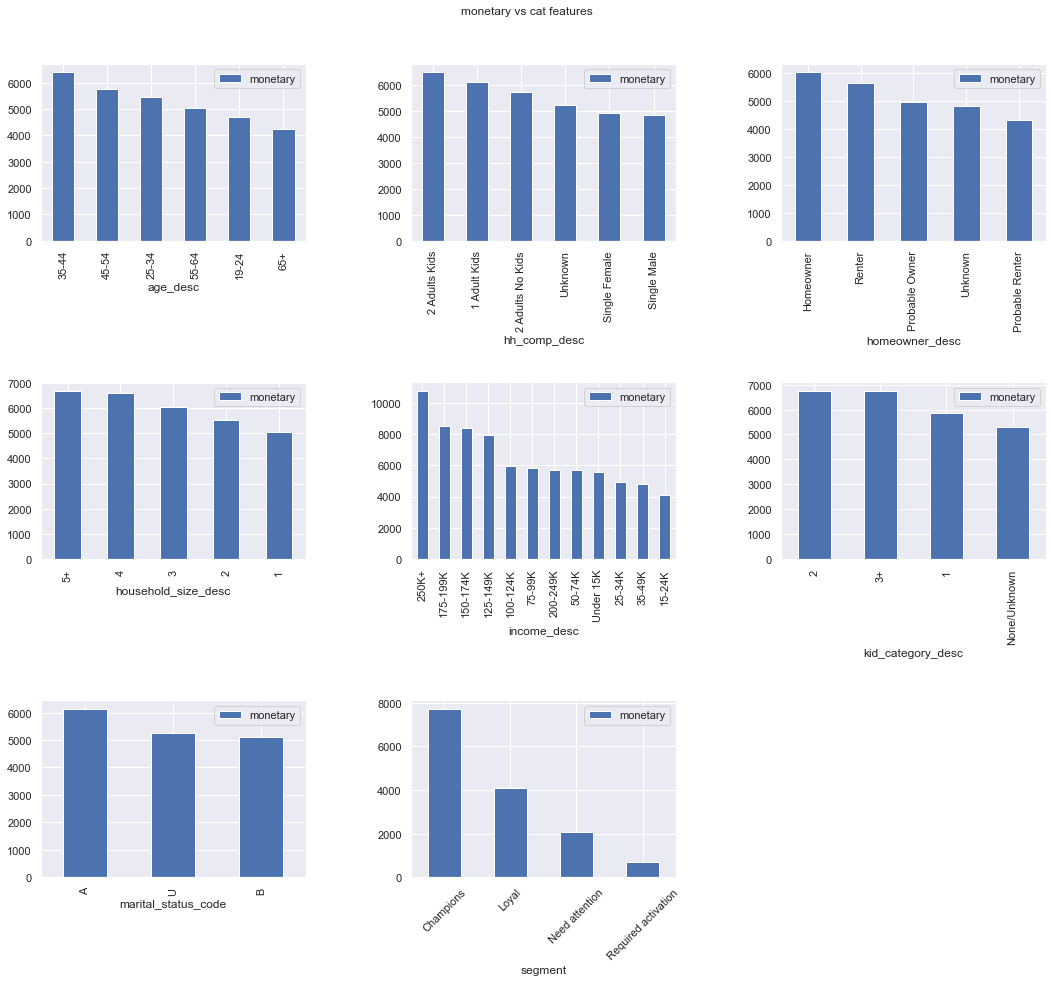

In [14]:
plot_multi_charts(data=households_full, x_column_list=cat_cols,y='monetary', 
                  title='mean monetary vs cat features',y_label='monetary',plot_type='bar',figsize=(18,40))    

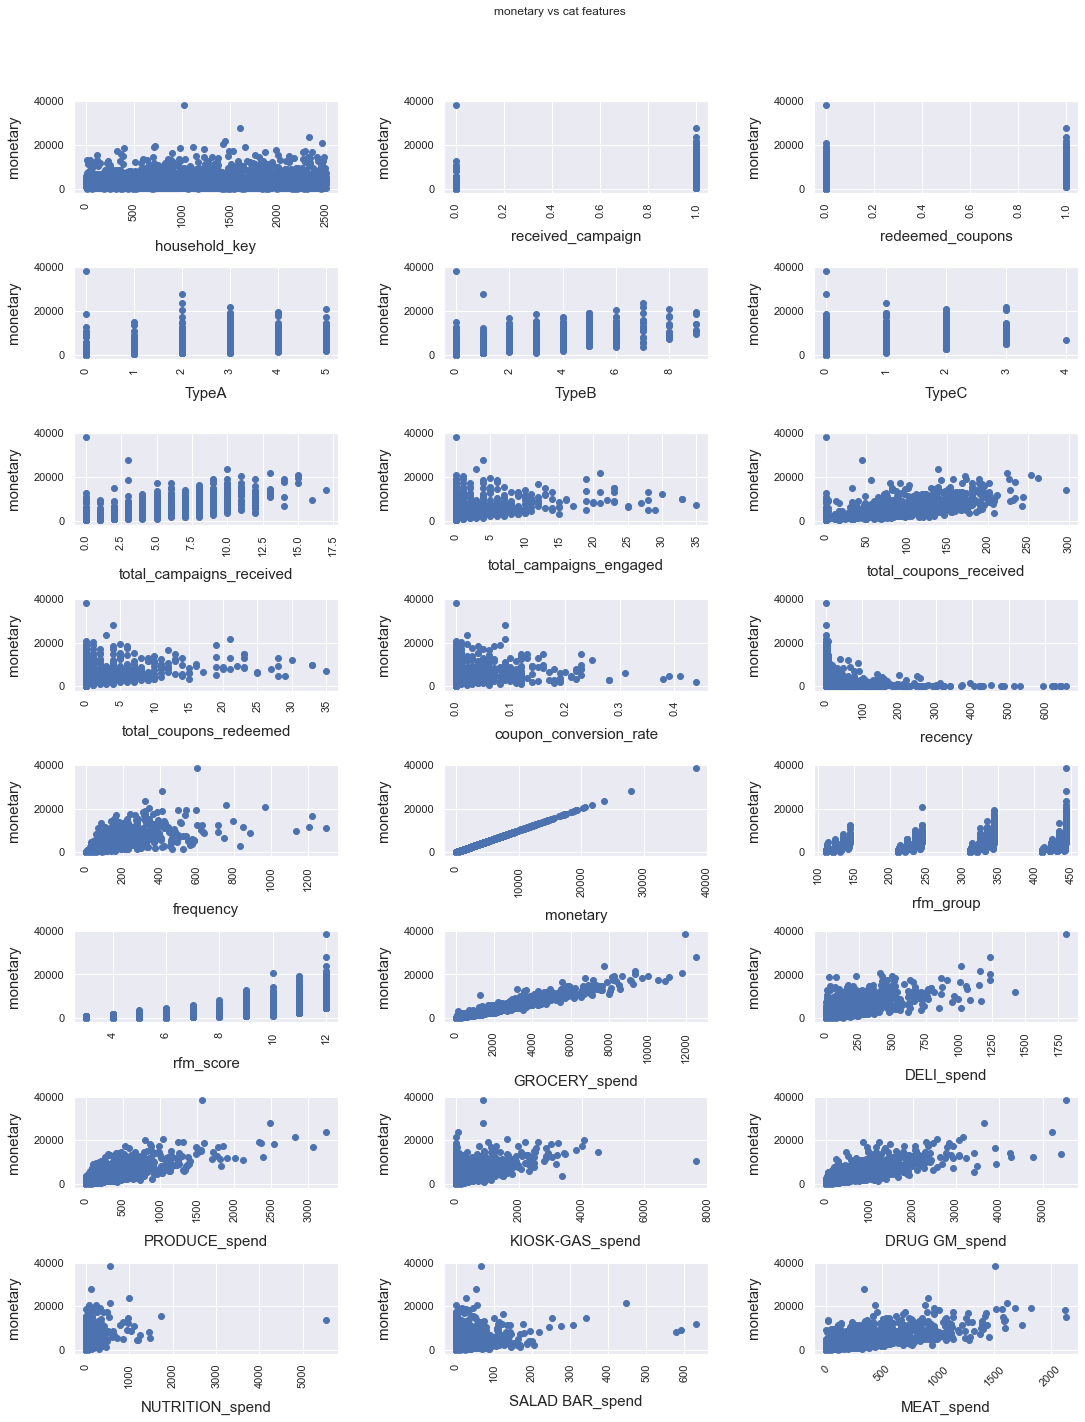

In [34]:
plot_multi_charts(data=households_full, x_column_list=num_cols,y='monetary', 
                  title='monetary vs cat features',y_label='monetary',plot_type='scatter',figsize=(18,65))    

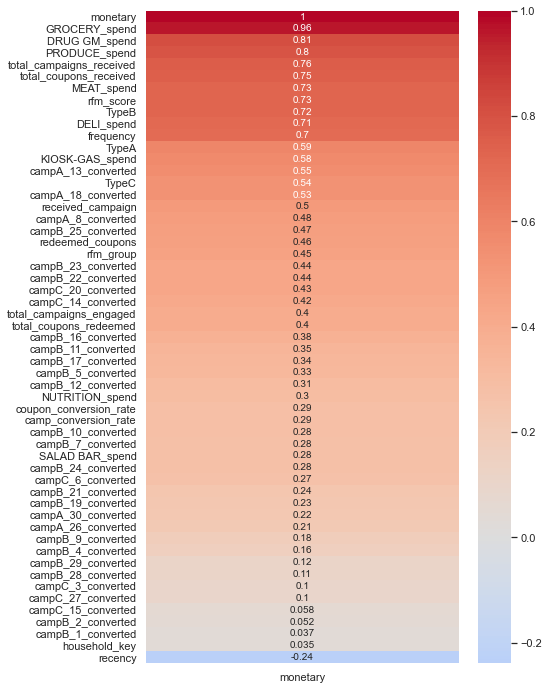

In [18]:
figure = plt.figure(figsize=(7,12))
sns.heatmap(households_full.corr()[['monetary']].sort_values('monetary',ascending=False),annot=True, cmap='coolwarm', center=0);
